In [1]:
# Import Everything we need

from DLAnalysis.Scan import *
from DLAnalysis.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


In [2]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels.Run.1/*"))
ModelDirs=glob.glob("TrainedModels/*.2")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

In [3]:
# Prep the Models

# Rename the Models using Width and Depth
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: ['All_ChPi_AUC', 'All_Ele_AUC', 'All_Gamma_AUC', 'All_Pi0_AUC', 'All_Width', 'All_History.val_acc', 'All_History.loss', 'All_History.val_loss', 'All_History.acc', 'All_Depth']


In [4]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Ele_AUC', 'Width', 'Depth', 'Pi0_AUC', 'Epochs', 'ChPi_AUC', 'Gamma_AUC']


In [5]:
# Make a Table of all relevant parameters, sort by 1,2,then 0 columns.
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'Width', 'Depth', 'Epochs', 'Ele_AUC',  'Pi0_AUC', 'ChPi_AUC',  'Gamma_AUC'],[1,2,0])

Model Name           Width    Depth    Epochs    Ele_AUC    Pi0_AUC    ChPi_AUC    Gamma_AUC
-----------------  -------  -------  --------  ---------  ---------  ----------  -----------
Width=32 Depth=1        32        1        27     0.9857     0.9560      0.9977       0.9569
Width=32 Depth=2        32        2        16     0.9843     0.9502      0.9986       0.9542
Width=32 Depth=3        32        3        12     0.8092     0.8077      0.9972       0.7605
Width=32 Depth=4        32        4        16     0.7009     0.7617      0.9973       0.6510
Width=64 Depth=1        64        1        26     0.9875     0.9567      0.9985       0.9616
Width=64 Depth=2        64        2        15     0.9887     0.9571      0.9988       0.9586
Width=64 Depth=3        64        3        24     0.9865     0.9564      0.9986       0.9602
Width=64 Depth=4        64        4        31     0.9874     0.9584      0.9986       0.9593
Width=128 Depth=1      128        1        26     0.9923     0.9672   

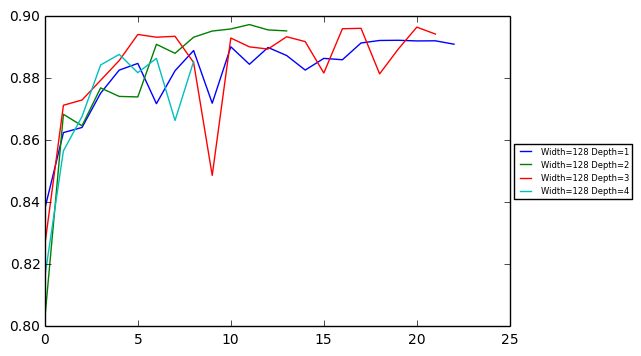

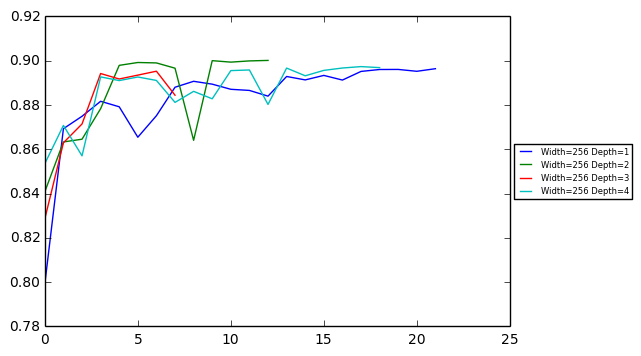

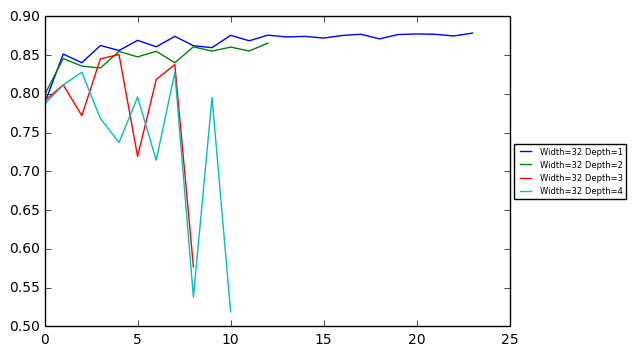

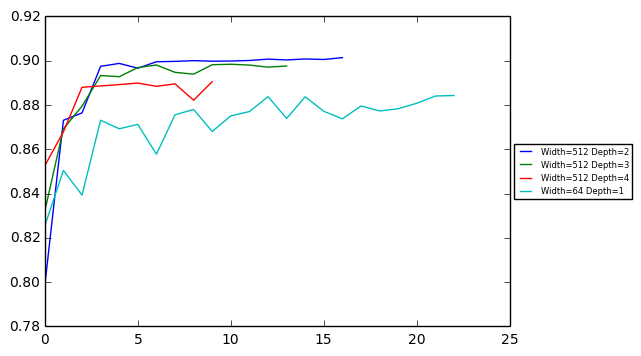

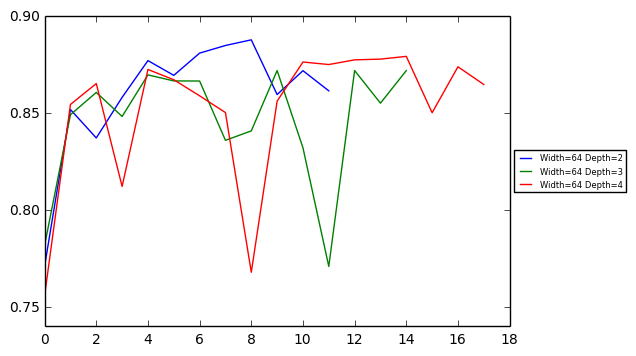

In [6]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
PlotMetaDataMany(MyModels,4,["All_History.val_acc"],loc="center left")

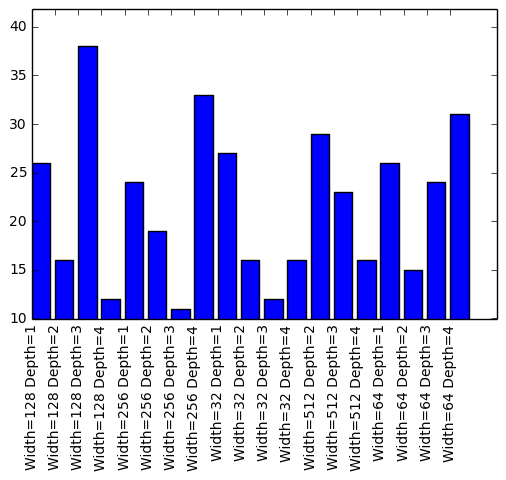

In [7]:
# Compare Number of Epochs each model ran (only last run)
PlotMetaData(MyModels,["Epochs"])

Ele_AUC


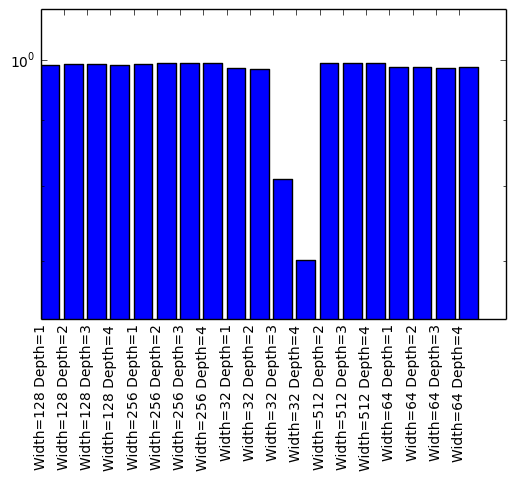

Pi0_AUC


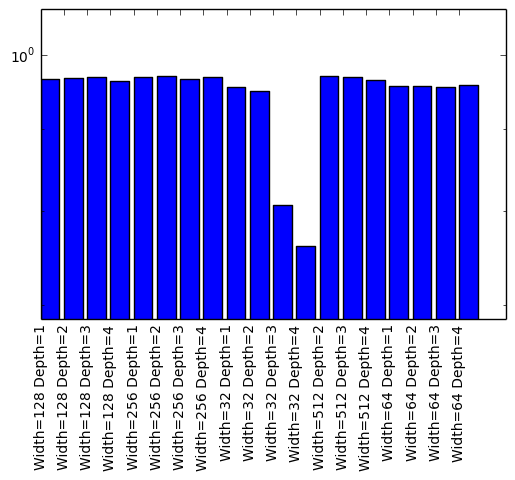

ChPi_AUC


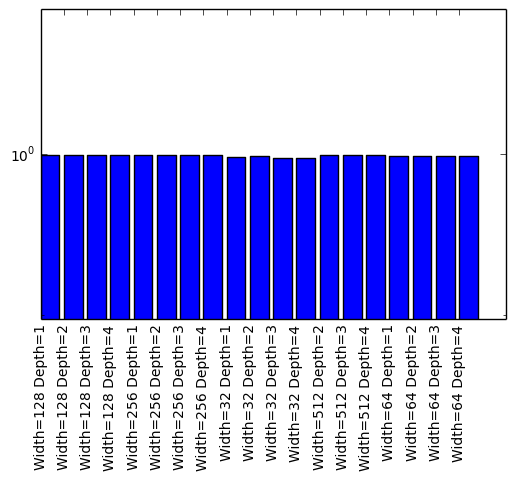

Gamma_AUC


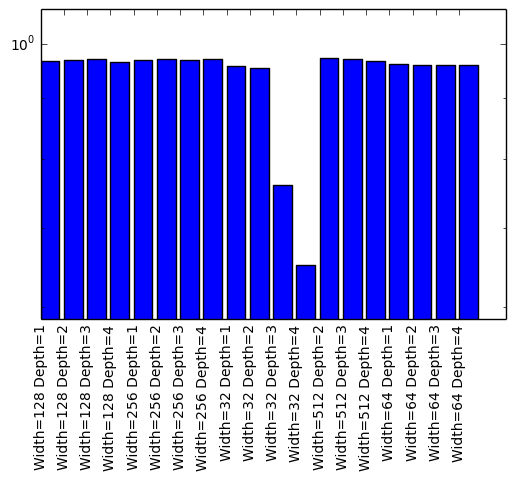

In [8]:
# Compare AUCs for all models
for p in ['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(MyModels,[p],log=True)
    plt.show()

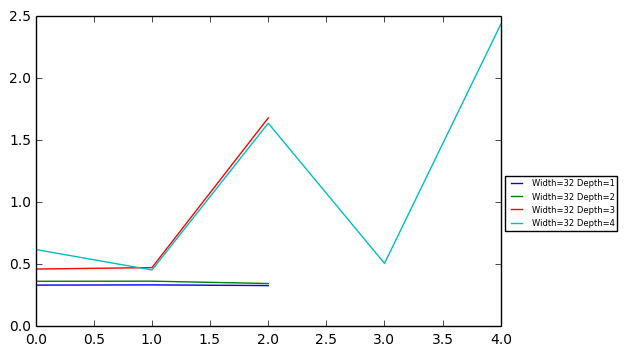

In [9]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==32, MyModels), ["History","val_loss"],loc=0)

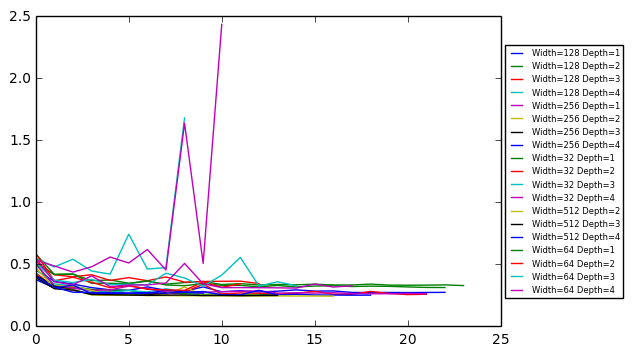

In [10]:
# Plot a varible for all trainings. This was pulled together above.
PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")